Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression I

During the guided project, we predicted how much it would cost to buy a condo in Tribecca. For the module project, your goal will be similar: predict how much it costs to rent an apartment in New York City.

Dataset source: [renthop.com](https://www.renthop.com/).

## Directions

> Do Not Copy-Paste. You must *type* each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.
>
> — Zed Shaw, [Learn Python the Hard Way](https://learnpythonthehardway.org/)

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using wrangle function.
- **Task 2:** Conduct exploratory data analysis (EDA) and plot the relationship between one feature and the target `'price'`.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Establish the baseline mean absolute error for your dataset.
- **Task 5:** Build and train a `Linearregression` model.
- **Task 6:** Check the mean absolute error of our model on the training data.
- **Task 7:** Extract and print the intercept and coefficient from your `LinearRegression` model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

## I. Wrangle Data

In [ ]:
def wrangle(filepath):
    df = pd.read_csv(filepath,
                     parse_dates=['created'])
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Use the above `wrangle` function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [ ]:
df = wrangle(filepath)

**Task 2:** Use your `pandas` and dataviz skills to explore the dataset. As part of this process, make a scatter plot that shows the relationship between one of the numerical features in the dataset and the target `'price'`.

**Remember:** You should plot your feature on the `X` axis and your target on the `y` axis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48817 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bathrooms             48817 non-null  float64       
 1   bedrooms              48817 non-null  int64         
 2   created               48817 non-null  datetime64[ns]
 3   description           47392 non-null  object        
 4   display_address       48684 non-null  object        
 5   latitude              48817 non-null  float64       
 6   longitude             48817 non-null  float64       
 7   price                 48817 non-null  int64         
 8   street_address        48807 non-null  object        
 9   interest_level        48817 non-null  object        
 10  elevator              48817 non-null  int64         
 11  cats_allowed          48817 non-null  int64         
 12  hardwood_floors       48817 non-null  int64         
 13  dogs_allowed    

In [ ]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


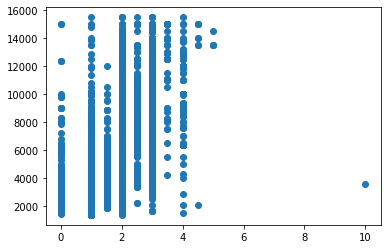

In [ ]:
plt.scatter(x=df['bathrooms'], y=df['price'])
plt.show()

In [ ]:
np.corrcoef(x=df['bathrooms'],y=df['price']) #graph looks weird, double check if two var correllate

array([[1.        , 0.68729554],
       [0.68729554, 1.        ]])

#  II. Split Data

**Task 3:** Choose one feature from the dataset and assign it to your feature matrix `X`. Then assign the column `'price'` to the target vector `y`.

**Remember:** Your feature matrix needs to be two-dimensional, but your feature matrix must be one-dimensional.

In [ ]:
X = df[['bathrooms']]
y = df['price']

In [ ]:
X.shape # try to make it a matrix bc sklearn needs it to be a matrix

(48817, 1)

In [ ]:
y.shape # this one is a list

(48817,)

# III. Establish Baseline

**Task 4:** Since this is a **regression** problem, you need to calculate the baseline the mean absolute error for your model. First, calculate the mean of `y`. Next, create a list `y_pred` that has the same length as `y` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [ ]:
# create a list of y_pred using the mean of y
y_mean = y.mean()
y_pred = [y_mean] * len(y)
len(y_pred)
type(y_pred)

list

In [ ]:
# find MAE using the create y_pred
baseline_mae = mean_absolute_error(y,y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1201.532252154329


# IV. Build Model

**Task 5:** Build and train a `LinearRegression` model named `model` using your feature matrix `X` and your target vector `y`.

In [ ]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# V. Check Metrics

**Task 6:** How does your model perform in comparison to your baseline? Calculate the mean absolute error for your model's predictions.

In [ ]:
y_pred1 = model.predict(X)

In [ ]:
training_mae = mean_absolute_error(y,y_pred1)

print('Training MAE:', training_mae)

Training MAE: 889.7631877413652


# VI. Communicate Results 

You've just created a linear model. That means that your model makes predictions using an equation that looks like $\texttt{apt price} = \texttt{intercept}~+~\texttt{coefficient}~\times~\texttt{your feature}$. But what are the values of the intercept and coefficient that your model is using? 

**Task 7:** Print out the intercept and coefficient associated with `model`.

In [ ]:
coefficient = model.coef_[0]
intercept = model.intercept_
print(f'apt price = {intercept} + {coefficient} x bathrooms')

apt price = 486.93308019286815 + 2573.3619830951247 x bathrooms


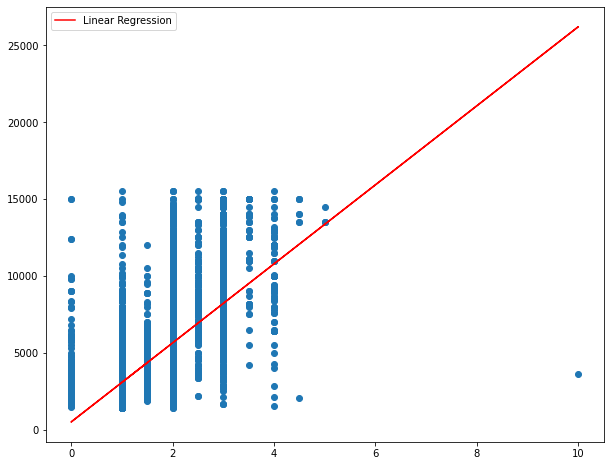

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X, y_pred1, label='Linear Regression', color='red')
plt.legend()
plt.show()

## Test different X find MAE

In [ ]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['interest_level'].value_counts()

low       33946
medium    11181
high       3690
Name: interest_level, dtype: int64

In [ ]:
df['interest_level'] = df['interest_level'].map({'low': 0, 'medium': 1, 'high': 2})

In [ ]:
df.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [41]:
X1 = df[['bathrooms', 'bedrooms', 'latitude', 'longitude', 'interest_level', 'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space']]

In [42]:
X1.shape

(48817, 29)

In [43]:
model1 = LinearRegression()
model1.fit(X1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
model1.coef_

array([ 1.72969148e+03,  4.91120575e+02,  1.27643033e+03, -1.30955630e+04,
       -4.18588381e+02,  1.39937179e+02, -3.16914906e+01, -1.73539767e+02,
        7.68548591e+01,  4.35845230e+02,  5.14068683e+01, -1.00394980e+02,
       -1.18907346e+02,  1.20778310e+02, -8.52463627e+01,  4.37900923e+02,
       -1.70581878e+02, -9.60133495e+01,  2.60226597e+02, -2.90154723e+02,
        1.65237231e+00,  7.05854440e+01, -1.48417419e+02,  1.43915715e+02,
        1.27159957e+02,  1.63885459e+02,  6.02241535e+01,  2.02447170e+02,
       -1.20687895e+02])

In [52]:
pd.Series(data=model1.coef_, index=X1.columns).abs().sort_values(ascending=False)

longitude               13095.562997
bathrooms                1729.691478
latitude                 1276.430326
bedrooms                  491.120575
laundry_in_unit           437.900923
doorman                   435.845230
interest_level            418.588381
high_speed_internet       290.154723
dining_room               260.226597
wheelchair_access         202.447170
hardwood_floors           173.539767
roof_deck                 170.581878
loft                      163.885459
new_construction          148.417419
terrace                   143.915715
elevator                  139.937179
exclusive                 127.159957
fitness_center            120.778310
common_outdoor_space      120.687895
laundry_in_building       118.907346
no_fee                    100.394980
outdoor_space              96.013350
pre-war                    85.246363
dogs_allowed               76.854859
swimming_pool              70.585444
garden_patio               60.224154
dishwasher                 51.406868
c

In [ ]:
y_pred2 = model1.predict(X1)

In [ ]:
training_mae1 = mean_absolute_error(y,y_pred2)
print(f'MAE: {training_mae} \nMAE1: {training_mae1}')

MAE: 889.7631877413652 
MAE1: 729.2944478243384
